In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("=== DIABETES FEATURE ENGINEERING ===")

# Load cleaned data
df_clean = pd.read_csv('../data/interim/diabetes_cleaned.csv')
print("Cleaned dataset loaded successfully!")
print(f"Shape: {df_clean.shape}")

=== DIABETES FEATURE ENGINEERING ===
Cleaned dataset loaded successfully!
Shape: (768, 9)


In [3]:

print("=== FEATURE ENGINEERING CONFIGURATION ===")
df_engineered = df_clean.copy()

print("Original features:")
print(list(df_engineered.columns))

print("\nFirst 3 rows of cleaned data:")
display(df_engineered.head(3))

=== FEATURE ENGINEERING CONFIGURATION ===
Original features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 3 rows of cleaned data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1


=== AGE GROUPS ENGINEERING ===
Age groups created:
Age_Group
Young     498
Middle    189
Senior     81
Name: count, dtype: int64


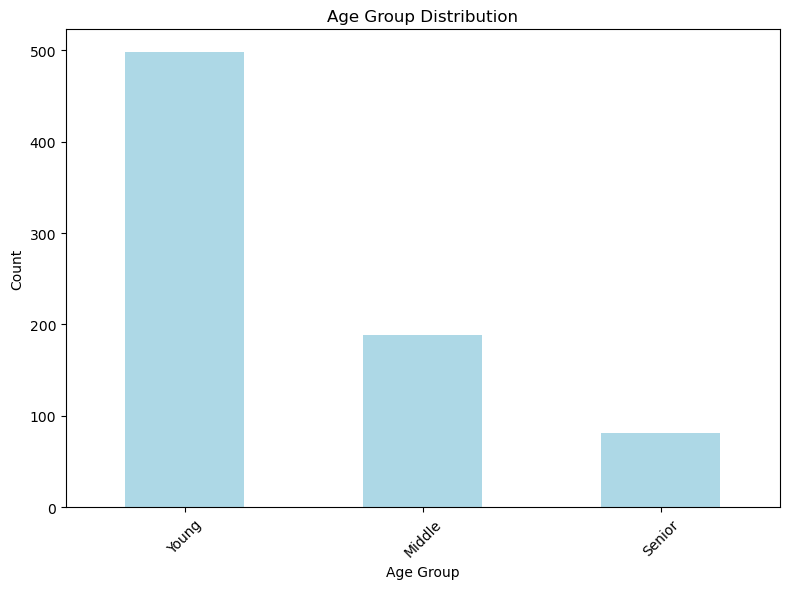

In [4]:

print("=== AGE GROUPS ENGINEERING ===")
# Clinical age categories for diabetes risk
age_bins = [20, 35, 50, 81]  # Young, Middle-aged, Senior
age_labels = ['Young', 'Middle', 'Senior']

df_engineered['Age_Group'] = pd.cut(df_engineered['Age'], bins=age_bins, labels=age_labels)

print("Age groups created:")
print(df_engineered['Age_Group'].value_counts().sort_index())

plt.figure(figsize=(8, 6))
df_engineered['Age_Group'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== AGE GROUPS VS DIABETES OUTCOME ===
Age Group vs Diabetes Outcome:


Outcome,0,1
Age_Group,,
Young,367,131
Middle,90,99
Senior,43,38



Percentage by Age Group:


Outcome,0,1
Age_Group,,
Young,73.7,26.3
Middle,47.6,52.4
Senior,53.1,46.9


<Figure size 1000x600 with 0 Axes>

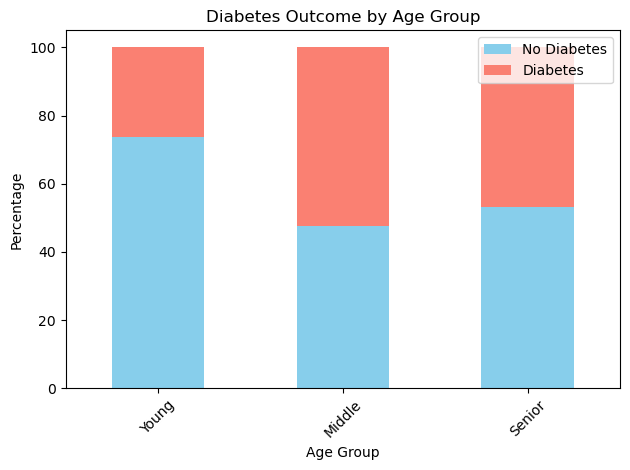

In [5]:

print("=== AGE GROUPS VS DIABETES OUTCOME ===")
age_outcome = pd.crosstab(df_engineered['Age_Group'], df_engineered['Outcome'])
age_outcome_percentage = age_outcome.div(age_outcome.sum(axis=1), axis=0) * 100

print("Age Group vs Diabetes Outcome:")
display(age_outcome)

print("\nPercentage by Age Group:")
display(age_outcome_percentage.round(1))

plt.figure(figsize=(10, 6))
age_outcome_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Diabetes Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== BMI CATEGORIES ENGINEERING ===
BMI categories created:
BMI_Category
Underweight      4
Normal         108
Overweight     180
Obese          476
Name: count, dtype: int64


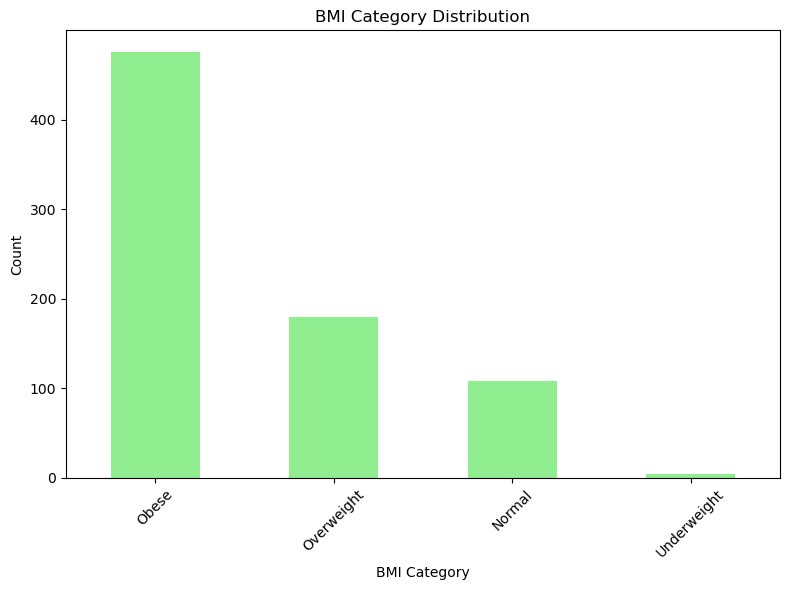

In [6]:

print("=== BMI CATEGORIES ENGINEERING ===")
# WHO BMI classification standards
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df_engineered['BMI_Category'] = pd.cut(df_engineered['BMI'], bins=bmi_bins, labels=bmi_labels)

print("BMI categories created:")
print(df_engineered['BMI_Category'].value_counts().sort_index())

plt.figure(figsize=(8, 6))
df_engineered['BMI_Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== BMI CATEGORIES VS DIABETES OUTCOME ===
BMI Category vs Diabetes Outcome:


Outcome,0,1
BMI_Category,,
Underweight,4,0
Normal,101,7
Overweight,136,44
Obese,259,217



Percentage by BMI Category:


Outcome,0,1
BMI_Category,,
Underweight,100.0,0.0
Normal,93.5,6.5
Overweight,75.6,24.4
Obese,54.4,45.6


<Figure size 1000x600 with 0 Axes>

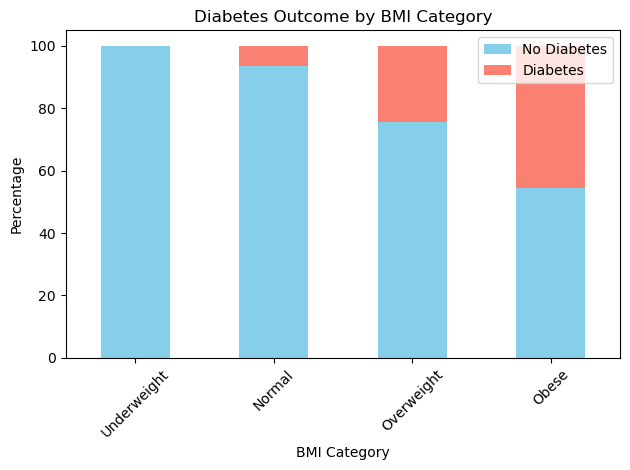

In [8]:

print("=== BMI CATEGORIES VS DIABETES OUTCOME ===")
bmi_outcome = pd.crosstab(df_engineered['BMI_Category'], df_engineered['Outcome'])
bmi_outcome_percentage = bmi_outcome.div(bmi_outcome.sum(axis=1), axis=0) * 100

print("BMI Category vs Diabetes Outcome:")
display(bmi_outcome)

print("\nPercentage by BMI Category:")
display(bmi_outcome_percentage.round(1))

plt.figure(figsize=(10, 6))
bmi_outcome_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Diabetes Outcome by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== GLUCOSE LEVEL CATEGORIES ===
Glucose levels created:
Glucose_Level
Normal         209
Prediabetic    271
Diabetic       288
Name: count, dtype: int64


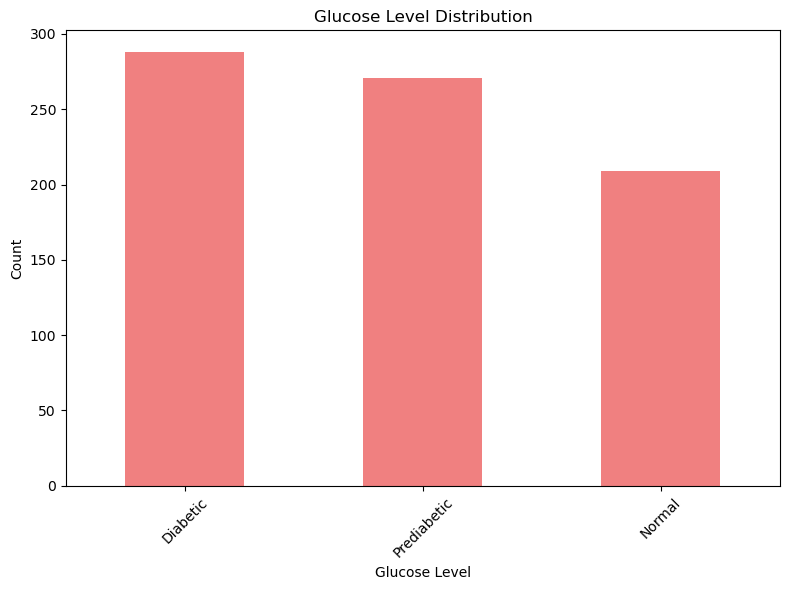

In [9]:

print("=== GLUCOSE LEVEL CATEGORIES ===")
# Clinical glucose thresholds
glucose_bins = [0, 100, 126, 300]
glucose_labels = ['Normal', 'Prediabetic', 'Diabetic']

df_engineered['Glucose_Level'] = pd.cut(df_engineered['Glucose'], bins=glucose_bins, labels=glucose_labels)

print("Glucose levels created:")
print(df_engineered['Glucose_Level'].value_counts().sort_index())

plt.figure(figsize=(8, 6))
df_engineered['Glucose_Level'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== GLUCOSE LEVELS VS DIABETES OUTCOME ===
Glucose Level vs Diabetes Outcome:


Outcome,0,1
Glucose_Level,,
Normal,191,18
Prediabetic,195,76
Diabetic,114,174



Percentage by Glucose Level:


Outcome,0,1
Glucose_Level,,
Normal,91.4,8.6
Prediabetic,72.0,28.0
Diabetic,39.6,60.4


<Figure size 1000x600 with 0 Axes>

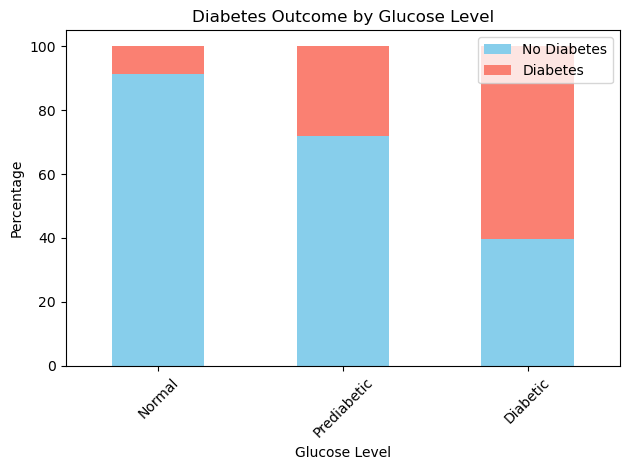

In [10]:

print("=== GLUCOSE LEVELS VS DIABETES OUTCOME ===")
glucose_outcome = pd.crosstab(df_engineered['Glucose_Level'], df_engineered['Outcome'])
glucose_outcome_percentage = glucose_outcome.div(glucose_outcome.sum(axis=1), axis=0) * 100

print("Glucose Level vs Diabetes Outcome:")
display(glucose_outcome)

print("\nPercentage by Glucose Level:")
display(glucose_outcome_percentage.round(1))

plt.figure(figsize=(10, 6))
glucose_outcome_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Diabetes Outcome by Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Percentage')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:

print("=== CATEGORICAL ENCODING ===")
categorical_features = ['Age_Group', 'BMI_Category', 'Glucose_Level']
label_encoders = {}

print("Label Encoding Applied:")
for feature in categorical_features:
    le = LabelEncoder()
    df_engineered[f'{feature}_encoded'] = le.fit_transform(df_engineered[feature])
    label_encoders[feature] = le
    encoding_map = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\n{feature}: {encoding_map}")

print("\nEncoded features added to dataset:")
encoded_features = [f'{feat}_encoded' for feat in categorical_features]
print(encoded_features)

=== CATEGORICAL ENCODING ===
Label Encoding Applied:

Age_Group: {'Middle': np.int64(0), 'Senior': np.int64(1), 'Young': np.int64(2)}

BMI_Category: {'Normal': np.int64(0), 'Obese': np.int64(1), 'Overweight': np.int64(2), 'Underweight': np.int64(3)}

Glucose_Level: {'Diabetic': np.int64(0), 'Normal': np.int64(1), 'Prediabetic': np.int64(2)}

Encoded features added to dataset:
['Age_Group_encoded', 'BMI_Category_encoded', 'Glucose_Level_encoded']


In [12]:

print("=== ENCODING VERIFICATION ===")
print("Sample of original and encoded values:")
sample_cols = ['Age_Group', 'Age_Group_encoded', 'BMI_Category', 'BMI_Category_encoded', 
               'Glucose_Level', 'Glucose_Level_encoded', 'Outcome']
display(df_engineered[sample_cols].head(10))

print("\nUnique values in encoded features:")
for feature in categorical_features:
    encoded_col = f'{feature}_encoded'
    unique_vals = df_engineered[encoded_col].unique()
    print(f"{encoded_col}: {sorted(unique_vals)}")

=== ENCODING VERIFICATION ===
Sample of original and encoded values:


,Age_Group,Age_Group_encoded,BMI_Category,BMI_Category_encoded,Glucose_Level,Glucose_Level_encoded,Outcome
0,Middle,0,Obese,1,Diabetic,0,1
1,Young,2,Overweight,2,Normal,1,0
2,Young,2,Normal,0,Diabetic,0,1
3,Young,2,Overweight,2,Normal,1,0
4,Young,2,Obese,1,Diabetic,0,1
5,Young,2,Overweight,2,Prediabetic,2,0
6,Young,2,Obese,1,Normal,1,1
7,Young,2,Obese,1,Prediabetic,2,0
8,Senior,1,Obese,1,Diabetic,0,1
9,Senior,1,Obese,1,Prediabetic,2,1



Unique values in encoded features:
Age_Group_encoded: [np.int64(0), np.int64(1), np.int64(2)]
BMI_Category_encoded: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Glucose_Level_encoded: [np.int64(0), np.int64(1), np.int64(2)]


In [13]:

print("=== FEATURE SCALING CONFIGURATION ===")
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("Numerical features to scale:")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i:2d}. {feature}")

print("\nStatistics before scaling:")
display(df_engineered[numerical_features].describe().round(3))

=== FEATURE SCALING CONFIGURATION ===
Numerical features to scale:
 1. Pregnancies
 2. Glucose
 3. BloodPressure
 4. SkinThickness
 5. Insulin
 6. BMI
 7. DiabetesPedigreeFunction
 8. Age

Statistics before scaling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,121.656,72.387,29.108,140.672,32.455,0.472,33.241
std,3.370,30.438,12.097,8.791,86.383,6.875,0.331,11.760
min,0.000,44.000,24.000,7.000,14.000,18.200,0.078,21.000
25%,1.000,99.750,64.000,25.000,121.500,27.500,0.244,24.000
50%,3.000,117.000,72.000,29.000,125.000,32.300,0.372,29.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000


In [14]:

print("=== APPLYING STANDARD SCALER ===")
scaler = StandardScaler()
df_scaled = df_engineered.copy()

# Scale numerical features
df_scaled[numerical_features] = scaler.fit_transform(df_engineered[numerical_features])

print("Scaling completed using StandardScaler")
print("Statistics after scaling:")
display(df_scaled[numerical_features].describe().round(3))

print("\nNote: Scaled features have mean ≈ 0 and std ≈ 1")

=== APPLYING STANDARD SCALER ===
Scaling completed using StandardScaler
Statistics after scaling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.142,-2.553,-4.003,-2.516,-1.467,-2.075,-1.190,-1.042
25%,-0.845,-0.720,-0.694,-0.468,-0.222,-0.721,-0.689,-0.786
50%,-0.251,-0.153,-0.032,-0.012,-0.182,-0.023,-0.300,-0.361
75%,0.640,0.611,0.630,0.329,-0.155,0.603,0.466,0.660
max,3.907,2.543,4.104,7.955,8.170,5.042,5.884,4.064



Note: Scaled features have mean ≈ 0 and std ≈ 1


In [15]:

print("=== SCALING VERIFICATION ===")
print("Mean values after scaling (should be close to 0):")
means = df_scaled[numerical_features].mean().round(6)
print(means)

print("\nStandard deviations after scaling (should be close to 1):")
stds = df_scaled[numerical_features].std().round(6)
print(stds)

# Check if scaling was successful
scaling_successful = all(means.abs() < 0.001) and all((stds - 1).abs() < 0.001)
if scaling_successful:
    print("✓ Scaling successful: All features properly scaled")
else:
    print("⚠ Scaling may have issues: Some features not perfectly scaled")

=== SCALING VERIFICATION ===
Mean values after scaling (should be close to 0):
Pregnancies                -0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness              -0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

Standard deviations after scaling (should be close to 1):
Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    1.000652
Age                         1.000652
dtype: float64
✓ Scaling successful: All features properly scaled


=== FEATURE CORRELATION ANALYSIS ===
Numerical features for correlation: 12
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_Group_encoded', 'BMI_Category_encoded', 'Glucose_Level_encoded']


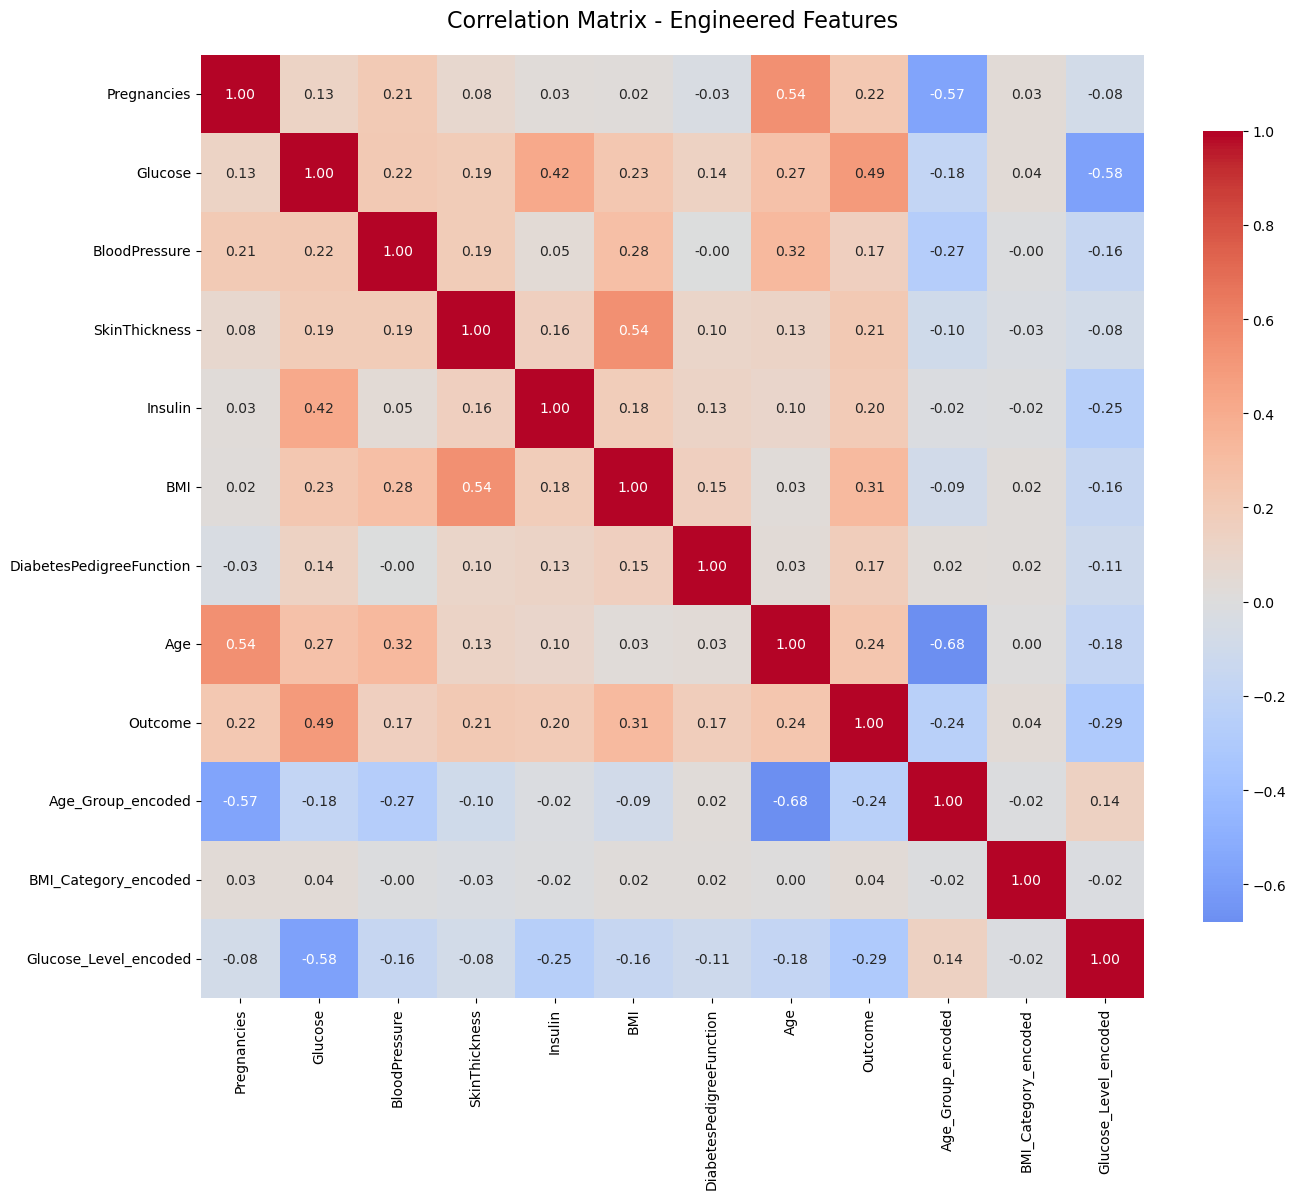

In [16]:

print("=== FEATURE CORRELATION ANALYSIS ===")
# Use only numerical features for correlation
numerical_cols = df_scaled.select_dtypes(include=[np.number]).columns

print(f"Numerical features for correlation: {len(numerical_cols)}")
print(list(numerical_cols))

correlation_matrix = df_scaled[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Engineered Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

=== FEATURE IMPORTANCE ANALYSIS ===
Features ranked by correlation with Outcome:
 2. Glucose: 0.493
 3. BMI: 0.312
 4. Glucose_Level_encoded: 0.295
 5. Age_Group_encoded: 0.242
 6. Age: 0.238
 7. Pregnancies: 0.222
 8. SkinThickness: 0.215
 9. Insulin: 0.204
10. DiabetesPedigreeFunction: 0.174
11. BloodPressure: 0.166
12. BMI_Category_encoded: 0.040


C:\Users\USER\AppData\Local\Temp\ipykernel_271328\3074178584.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


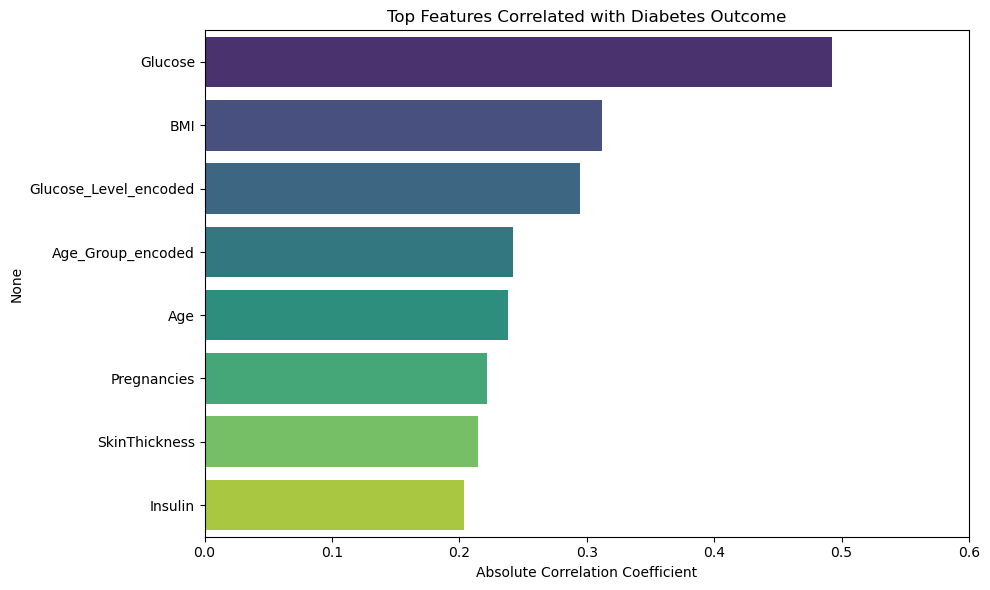

In [17]:

print("=== FEATURE IMPORTANCE ANALYSIS ===")
if 'Outcome' in correlation_matrix.columns:
    outcome_corr = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
    
    print("Features ranked by correlation with Outcome:")
    for i, (feature, corr) in enumerate(outcome_corr.items(), 1):
        if feature != 'Outcome':  # Skip self-correlation
            print(f"{i:2d}. {feature}: {corr:.3f}")
    
    # Visualize top features
    top_features = outcome_corr[1:9]  # Skip Outcome itself
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title('Top Features Correlated with Diabetes Outcome')
    plt.xlabel('Absolute Correlation Coefficient')
    plt.xlim(0, 0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Outcome column not found in correlation matrix")

In [18]:

print("=== SAVE FINAL PROCESSED DATA ===")
import os

# Create directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save final dataset
final_path = '../data/processed/diabetes_processed.csv'
df_scaled.to_csv(final_path, index=False)
print(f"✓ Final processed data saved to: {final_path}")

# Also save without scaling for reference
unscaled_path = '../data/processed/diabetes_engineered_unscaled.csv'
df_engineered.to_csv(unscaled_path, index=False)
print(f"✓ Unscaled engineered data saved to: {unscaled_path}")

=== SAVE FINAL PROCESSED DATA ===
✓ Final processed data saved to: ../data/processed/diabetes_processed.csv
✓ Unscaled engineered data saved to: ../data/processed/diabetes_engineered_unscaled.csv


In [19]:

print("=== DATA DICTIONARY ===")
data_dict = {
    # Original features
    'Pregnancies': 'Number of times pregnant (integer)',
    'Glucose': 'Plasma glucose concentration (mg/dL) - cleaned and scaled',
    'BloodPressure': 'Diastolic blood pressure (mm Hg) - cleaned and scaled', 
    'SkinThickness': 'Triceps skin fold thickness (mm) - cleaned and scaled',
    'Insulin': '2-Hour serum insulin (mu U/ml) - cleaned and scaled',
    'BMI': 'Body mass index (kg/m²) - cleaned and scaled',
    'DiabetesPedigreeFunction': 'Diabetes pedigree function - scaled',
    'Age': 'Age in years - scaled',
    
    # Engineered categorical features
    'Age_Group': 'Categorical age groups (Young: 21-35, Middle: 36-50, Senior: 51-81)',
    'BMI_Category': 'BMI classification (Underweight: <18.5, Normal: 18.5-24.9, Overweight: 25-29.9, Obese: ≥30)',
    'Glucose_Level': 'Glucose categories (Normal: <100, Prediabetic: 100-125, Diabetic: ≥126)',
    
    # Encoded features
    'Age_Group_encoded': 'Encoded age groups (0=Young, 1=Middle, 2=Senior)',
    'BMI_Category_encoded': 'Encoded BMI categories (0=Underweight, 1=Normal, 2=Overweight, 3=Obese)',
    'Glucose_Level_encoded': 'Encoded glucose levels (0=Normal, 1=Prediabetic, 2=Diabetic)',
    
    # Target
    'Outcome': 'Target variable (0=non-diabetic, 1=diabetic)'
}

print("Data Dictionary for Processed Dataset:")
print("=" * 70)
for feature, description in data_dict.items():
    if feature in df_scaled.columns:
        print(f"• {feature:25} : {description}")

=== DATA DICTIONARY ===
Data Dictionary for Processed Dataset:
• Pregnancies               : Number of times pregnant (integer)
• Glucose                   : Plasma glucose concentration (mg/dL) - cleaned and scaled
• BloodPressure             : Diastolic blood pressure (mm Hg) - cleaned and scaled
• SkinThickness             : Triceps skin fold thickness (mm) - cleaned and scaled
• Insulin                   : 2-Hour serum insulin (mu U/ml) - cleaned and scaled
• BMI                       : Body mass index (kg/m²) - cleaned and scaled
• DiabetesPedigreeFunction  : Diabetes pedigree function - scaled
• Age                       : Age in years - scaled
• Age_Group                 : Categorical age groups (Young: 21-35, Middle: 36-50, Senior: 51-81)
• BMI_Category              : BMI classification (Underweight: <18.5, Normal: 18.5-24.9, Overweight: 25-29.9, Obese: ≥30)
• Glucose_Level             : Glucose categories (Normal: <100, Prediabetic: 100-125, Diabetic: ≥126)
• Age_Group_encoded

In [20]:

print("=== FEATURE ENGINEERING SUMMARY ===")
print("🎯 ENGINEERING OPERATIONS COMPLETED")
print("=" * 50)

print("1. AGE GROUPS CREATION")
print(f"   - Young (21-35): {len(df_engineered[df_engineered['Age_Group'] == 'Young'])} patients")
print(f"   - Middle (36-50): {len(df_engineered[df_engineered['Age_Group'] == 'Middle'])} patients") 
print(f"   - Senior (51-81): {len(df_engineered[df_engineered['Age_Group'] == 'Senior'])} patients")

print("\n2. BMI CATEGORIES CREATION")
for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
    count = len(df_engineered[df_engineered['BMI_Category'] == category])
    print(f"   - {category}: {count} patients")

print("\n3. GLUCOSE LEVELS CREATION")  
for level in ['Normal', 'Prediabetic', 'Diabetic']:
    count = len(df_engineered[df_engineered['Glucose_Level'] == level])
    print(f"   - {level}: {count} patients")

print("\n4. ENCODING APPLIED")
print("   - All categorical features label encoded")
print("   - Natural ordering preserved")

print("\n5. FEATURE SCALING")
print("   - 8 numerical features scaled using StandardScaler")
print("   - Mean centered and unit variance achieved")

=== FEATURE ENGINEERING SUMMARY ===
🎯 ENGINEERING OPERATIONS COMPLETED
1. AGE GROUPS CREATION
   - Young (21-35): 498 patients
   - Middle (36-50): 189 patients
   - Senior (51-81): 81 patients

2. BMI CATEGORIES CREATION
   - Underweight: 4 patients
   - Normal: 108 patients
   - Overweight: 180 patients
   - Obese: 476 patients

3. GLUCOSE LEVELS CREATION
   - Normal: 209 patients
   - Prediabetic: 271 patients
   - Diabetic: 288 patients

4. ENCODING APPLIED
   - All categorical features label encoded
   - Natural ordering preserved

5. FEATURE SCALING
   - 8 numerical features scaled using StandardScaler
   - Mean centered and unit variance achieved


In [21]:

print("=== FINAL DATASET OVERVIEW ===")
print(f"📊 DATASET STATISTICS")
print("=" * 40)
print(f"Original features: {len(df_clean.columns)}")
print(f"Engineered features: {len(df_scaled.columns) - len(df_clean.columns)}")
print(f"Total features: {len(df_scaled.columns)}")
print(f"Samples: {len(df_scaled)}")

print(f"\n📁 OUTPUT FILES")
print("=" * 40)
print(f"• {final_path} - Fully processed dataset (scaled)")
print(f"• {unscaled_path} - Engineered dataset (unscaled)")

print(f"\n✅ FEATURE ENGINEERING COMPLETED SUCCESSFULLY!")
print("=" * 50)
print("The dataset is now optimized for machine learning with:")
print("  • Clinically meaningful features")
print("  • Proper encoding for categorical variables") 
print("  • Standardized numerical features")
print("  • Comprehensive data dictionary")
print("  • Ready for model training!")

=== FINAL DATASET OVERVIEW ===
📊 DATASET STATISTICS
Original features: 9
Engineered features: 6
Total features: 15
Samples: 768

📁 OUTPUT FILES
• ../data/processed/diabetes_processed.csv - Fully processed dataset (scaled)
• ../data/processed/diabetes_engineered_unscaled.csv - Engineered dataset (unscaled)

✅ FEATURE ENGINEERING COMPLETED SUCCESSFULLY!
The dataset is now optimized for machine learning with:
  • Clinically meaningful features
  • Proper encoding for categorical variables
  • Standardized numerical features
  • Comprehensive data dictionary
  • Ready for model training!
